Enter city name:  chittoor



🌤 Weather in chittoor:
🌡 Temperature: 28.4°C
💧 Humidity: 64%
🌬 Wind Speed: 5.12 m/s
🔄 Pressure: 1011 hPa
📌 Description: scattered clouds


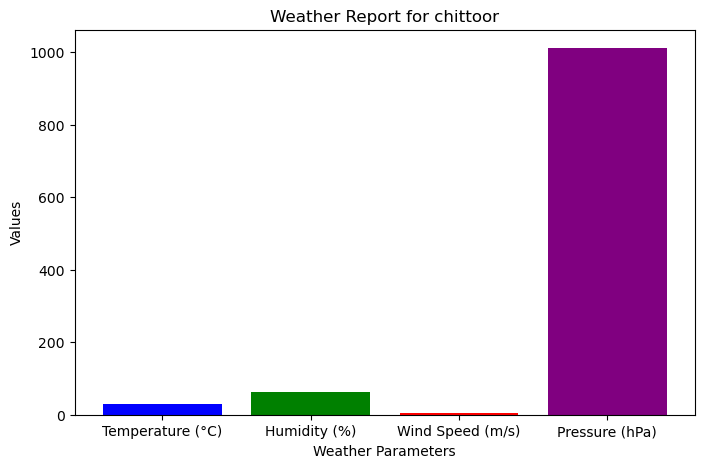

C:\Users\aadar\AppData\Local\Temp\ipykernel_29864\2749080554.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_params, y=values, palette="coolwarm")  # Create barplot using seaborn


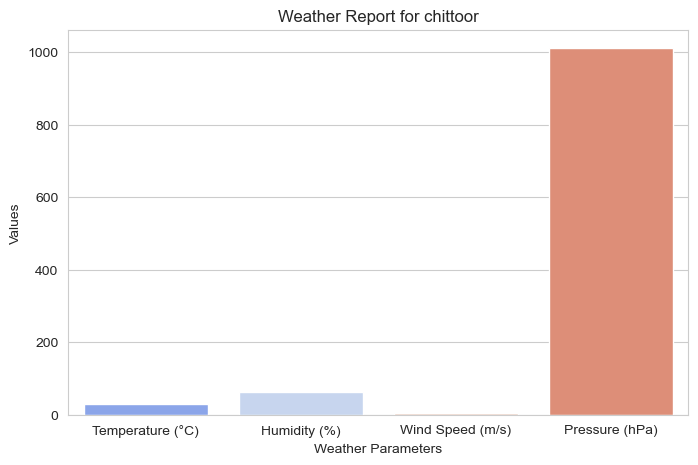

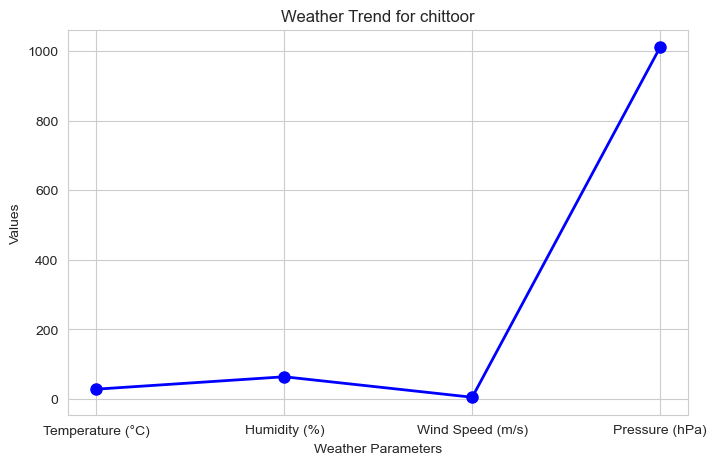

In [2]:
# Import required libraries
import os  # For accessing environment variables
import json  # (Not used in this script, but commonly used for JSON operations)
import requests  # For sending HTTP requests to the API
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For enhanced plotting style using seaborn

# Load API key from environment variable
api_key = os.getenv("WEATHER_API_KEY")  # Retrieves the API key stored in your system environment

# Raise an error if API key is not found
if not api_key:
    raise ValueError("API Key not found! Set the WEATHER_API_KEY environment variable.")

# Ask user to enter a city name
city_name = input("Enter city name: ")

# Construct the API URL using user input and API key
api_url = f'https://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={api_key}&units=metric'

# Send a GET request to the OpenWeatherMap API
response = requests.get(api_url)

# If API request is successful (HTTP 200 OK)
if response.status_code == 200:
    data = response.json()  # Parse JSON data from the response

    # Extract relevant weather information
    temperature = data["main"]["temp"]
    humidity = data["main"]["humidity"]
    wind_speed = data["wind"]["speed"]
    pressure = data["main"]["pressure"]
    weather_description = data['weather'][0]['description']

    # Display the weather details
    print(f"\n🌤 Weather in {city_name}:")
    print(f"🌡 Temperature: {temperature}°C")
    print(f"💧 Humidity: {humidity}%")
    print(f"🌬 Wind Speed: {wind_speed} m/s")
    print(f"🔄 Pressure: {pressure} hPa")
    print(f"📌 Description: {weather_description}")

    # Prepare weather data for plotting
    weather_params = ["Temperature (°C)", "Humidity (%)", "Wind Speed (m/s)", "Pressure (hPa)"]
    values = [temperature, humidity, wind_speed, pressure]

    # ----------------------------
    # 🔹 Basic Bar Chart using matplotlib
    # ----------------------------
    plt.figure(figsize=(8, 5))
    plt.bar(weather_params, values, color=['blue', 'green', 'red', 'purple'])
    plt.xlabel("Weather Parameters")
    plt.ylabel("Values")
    plt.title(f"Weather Report for {city_name}")
    plt.show()

    # ----------------------------
    # 🔹 Bar Chart with seaborn styling
    # ----------------------------
    sns.set_style("whitegrid")  # Set seaborn plot style
    plt.figure(figsize=(8, 5))
    sns.barplot(x=weather_params, y=values, palette="coolwarm")  # Create barplot using seaborn
    plt.xlabel("Weather Parameters")
    plt.ylabel("Values")
    plt.title(f"Weather Report for {city_name}")
    plt.show()

    # ----------------------------
    # 🔹 Line Chart to show trend
    # ----------------------------
    plt.figure(figsize=(8, 5))
    plt.plot(weather_params, values, marker='o', linestyle='-', color='blue', linewidth=2, markersize=8)
    plt.xlabel("Weather Parameters")
    plt.ylabel("Values")
    plt.title(f"Weather Trend for {city_name}")
    plt.grid(True)
    plt.show()

# If the API request failed (e.g., invalid city name or no internet)
else:
    print("❌ Error: Unable to fetch weather data. Please check the city name and try again.")
